In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import keras as k


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = k.utils.get_file('flower_photos', origin=dataset_url, untar= True)
data_dir


228813984/228813984 [==============================] - 1s 0us/step


'/root/.keras/datasets/flower_photos'

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=13,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split =0.2,
    subset="validation",
    seed=13,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

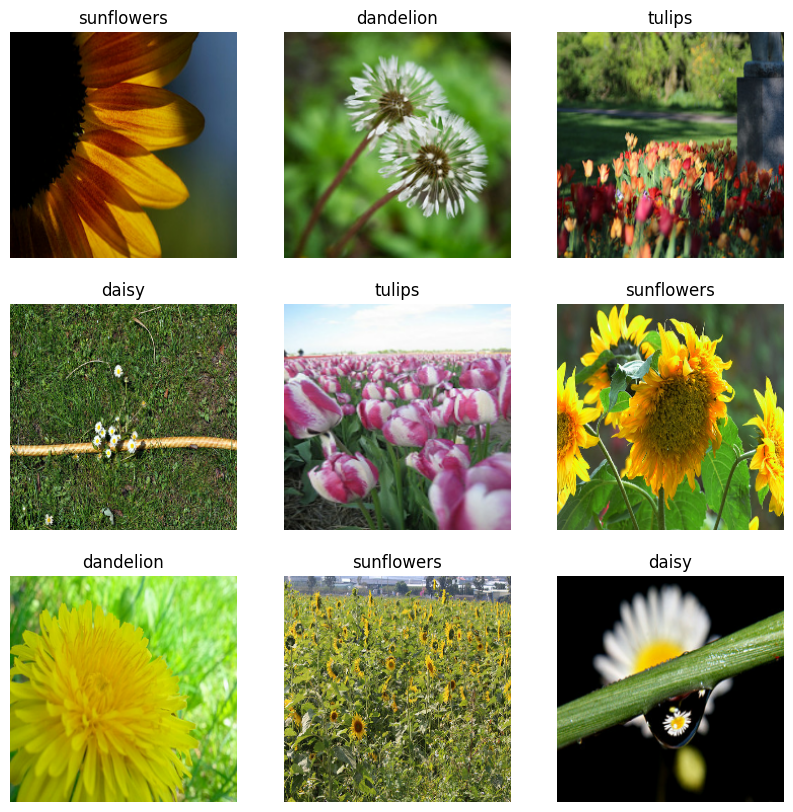

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
AUTOTUNE= tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)

In [9]:
input_t = k.Input(shape=(img_height,img_width,3))
inception_model = k.applications.VGG16(include_top=False, weights="imagenet", input_tensor=input_t) #try it using "imagenet" in weights
for layer in inception_model.layers:
        layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
model = k.models.Sequential()
model.add(inception_model)
model.add(k.layers.Flatten())
model.add(k.layers.Dense(1024, activation='relu'))
model.add(k.layers.Dense(units=5, activation="softmax"))


In [11]:
model.compile(optimizer='adam', loss=k.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [12]:
history = model.fit(train_ds, validation_data = val_ds, epochs=10)

Epoch 1/10
92/92 [==============================] - 41s 271ms/step - loss: 14.6034 - accuracy: 0.7176 - val_loss: 0.8506 - val_accuracy: 0.8174
Epoch 2/10
92/92 [==============================] - 15s 162ms/step - loss: 0.2582 - accuracy: 0.9288 - val_loss: 0.7917 - val_accuracy: 0.8651
Epoch 3/10
92/92 [==============================] - 15s 165ms/step - loss: 0.0648 - accuracy: 0.9813 - val_loss: 0.6881 - val_accuracy: 0.8569
Epoch 4/10
92/92 [==============================] - 16s 169ms/step - loss: 0.0212 - accuracy: 0.9949 - val_loss: 0.7794 - val_accuracy: 0.8474
Epoch 5/10
92/92 [==============================] - 16s 175ms/step - loss: 0.0107 - accuracy: 0.9986 - val_loss: 0.7303 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 18s 198ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.7467 - val_accuracy: 0.8665
Epoch 7/10
92/92 [==============================] - 16s 172ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.7558 - val_accuracy: 0.865

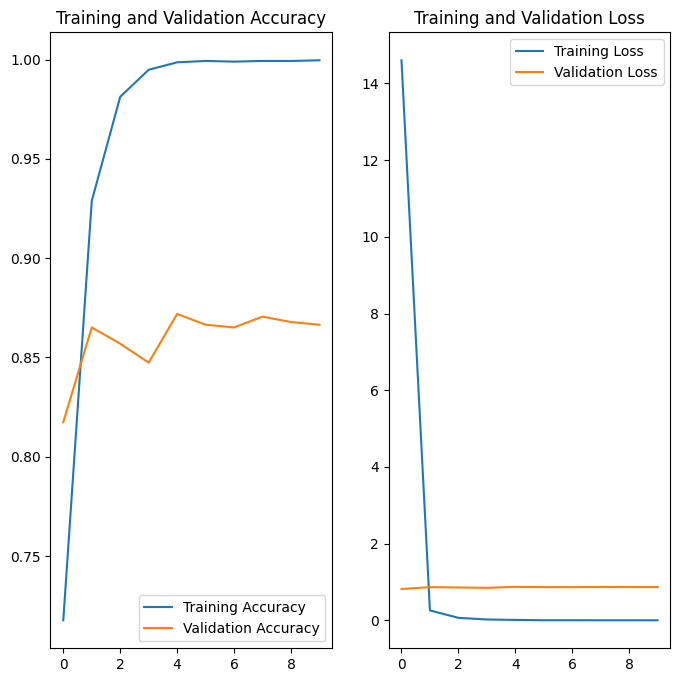

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_accuracy']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()